## <a class="anchor" id="0"></a> <b>Оглавление<b/>

* [Задача 1](#1)
* [Задача 2](#2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

### <a class="anchor" id="1"></a> Задача 1

[Оглавление](#0)

Реализовать в python метод градиентного спуска для одной и двух переменных. Для примера 1 (функция одной переменной) построить график сходимости.

#### Метод градиентного спуска: функция одной переменной

In [2]:
def f(x):
    return 3 * x**2 

def df(x):
    return 6 * x 

In [3]:
x0 = 5
lambda_ = 0.1
result = []

while True:
    result.append((x0, f(x0)))
    x1 = x0 - lambda_ * df(x0)
    if np.linalg.norm(x0 - x1) <= 0.000000001:
        break
    x0 = x1
    
result_df = pd.DataFrame(data = result, columns = ['x', 'y'])

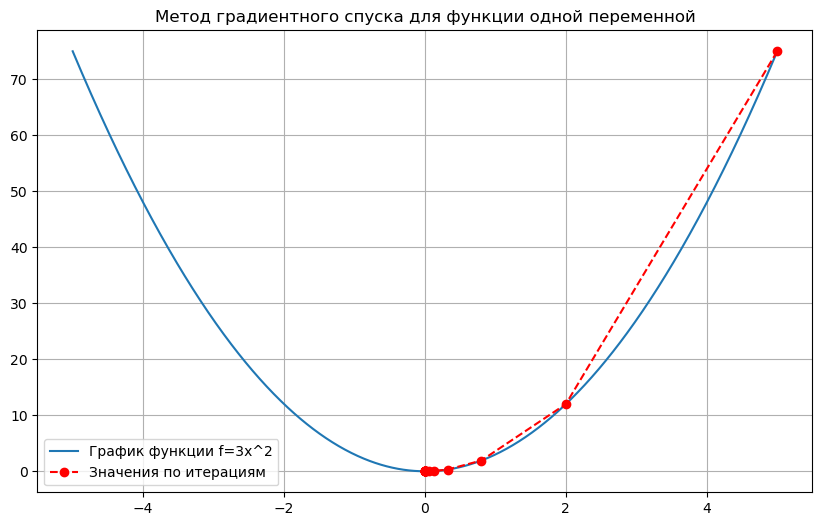

In [4]:
plt.figure(figsize=(10, 6))
x_fx = np.linspace(-5, 5, 1000)
y_fx = f(x_fx)

plt.plot(x_fx, y_fx, label='График функции f=3x^2')
plt.plot(result_df['x'], result_df['y'], marker = "o", linestyle='--', color = 'red', label='Значения по итерациям')
plt.title('Метод градиентного спуска для функции одной переменной')
plt.legend()
plt.grid(True)
plt.show()

#### Метод градиентного спуска: функция двух переменных

In [5]:
def f_new(x, y):
    return 3 * x**2 + 5 * y**2

def df_new(x, y):
    return np.array([6 * x, 10 * y])

In [6]:
x0 = np.array([5, 10])
lambda_ = 0.1
result = [] 

while True:
    result.append(np.append(x0, f_new(*x0)))
    x1 = x0 - lambda_ * df_new(*x0)   
    if np.linalg.norm(x1 - x0 ) <= 0.000000001:  
        break
    x0 = x1

(x0 - x1)**2

array([7.13053463e-19, 0.00000000e+00])

### <a class="anchor" id="2"></a> Задача 2

[Оглавление](#0)

Реализовать метод наискорейшего спуска в python или WM.

#### Метод наискорейшего спуска

In [7]:
def func(lambda_, x0):
    return f(x0**(k-1)) - lambda_ * df(x0**(k-1))

x0 = 5
result = []
lam_ = 0.2
k = 1

while True:
    res = minimize(func, lam_, args=(x0,), bounds=[(0, None)]) 
    lam = (res.x[0]) ** 1/k
    result.append([x0, f(x0), lam_, k])
    x1 = x0 - lam_ * df(x0)
    if np.linalg.norm(x0 - x1) <= 0.000000001:
        break

    x0 = x1
    k += 1

result_df = pd.DataFrame(result, columns=["x0", "f(x0)", "lambda", "k"])

In [8]:
def func(lambda_, x0):
    return f(x0**(k-1)) - lambda_ * df(x0**(k-1))

# Начальные значения
x0 = 5
result = []
lam = 0.25
k = 1
while True:
    res = minimize(func, lam, args=(x0,), bounds=[(0, None)]) 
    lam_ = (res.x[0]) ** 1/k

    result.append([x0, f(x0), lam, k])
    x1 = x0 - lam * df(x0)
    if np.linalg.norm(x0 - x1) <= 0.000000001:
        break

    x0 = x1
    k += 1

result_df = pd.DataFrame(result, columns=['x0', 'f(x0)', 'lambda', 'k'])

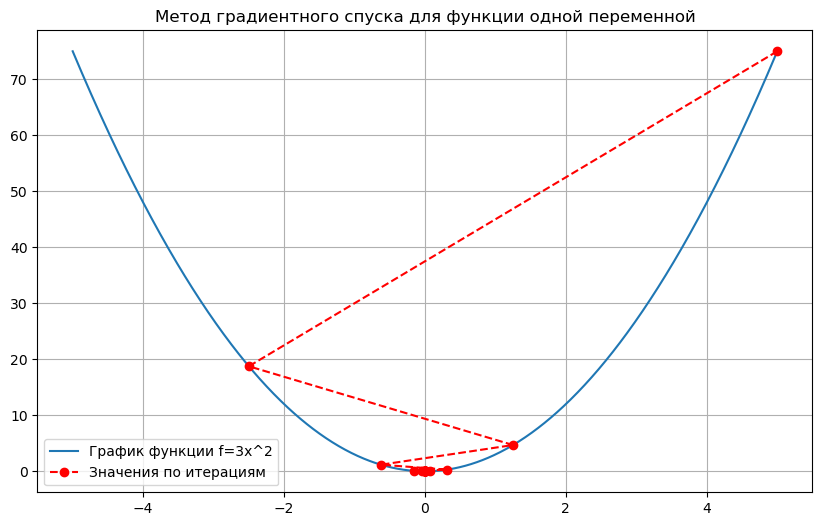

In [9]:
plt.figure(figsize=(10, 6))
x_f = np.linspace(-5, 5, 1000)
y_f = f(x_f)

plt.plot(x_f, y_f, label='График функции f=3x^2')
plt.plot(result_df['x0'], result_df['f(x0)'], marker = "o", linestyle='--', color = 'red', label='Значения по итерациям')
plt.title('Метод градиентного спуска для функции одной переменной')
plt.legend()
plt.grid(True)
plt.show()